# 04 - Absolute vs. Relative Frequency

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diamonds.csv')
df.shape

(53940, 10)

In [ ]:
df.head(5)

## Absolute vs Relative Frequency

Previously, we saw bar charts in the previous concept were all encoded with the absolute frequency or number of data points on the length axis. Sometimes you might to seethe relative frequency: the _proportion_ of the data in each category.

In [5]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [6]:
order = df['clarity'].value_counts().index

<Axes: xlabel='count', ylabel='clarity'>

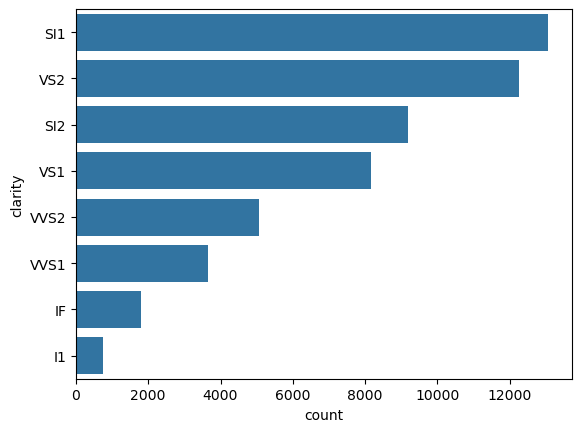

In [7]:
sns.countplot(data=df, y='clarity', color='tab:blue', order=order)

## Countplot vs. Bar plots

We cannot use a countplot for proportions; they require integer values. Instead, we must use a barplot.

We start by normalizing the data. We can use the builtin pandas `normalize` function, or you can do it manually.

In [9]:
clarity_counts = df['clarity'].value_counts(normalize=True)

<Axes: xlabel='proportion', ylabel='clarity'>

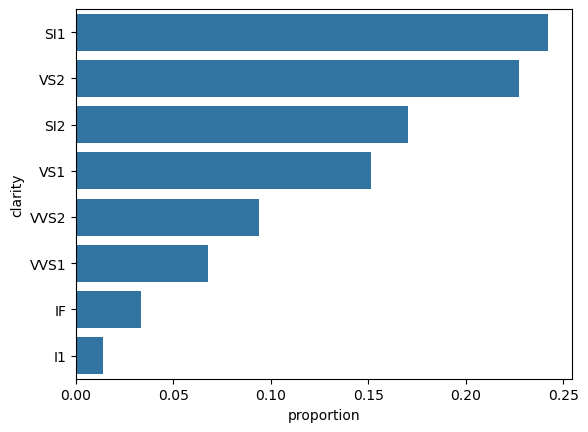

In [10]:
clarity_counts = clarity_counts.reset_index(drop=False)
clarity_counts = clarity_counts.rename(columns={'index': 'clarity', 'clarity': 'proportion'})

sns.barplot(data=clarity_counts, y='clarity', x='proportion', color='tab:blue', order=order)

## Combining information on one plot

Alternatively, could have the axes list counts, and use text to show proportion. Matplotlib and seaborn can easily do this.

We go back to a seaborn count plot, but we use a loop to place text element on each bar, one by one. The first argument is the X position, the second argument is the Y position, and the third argument is the string to be printed. Finally, I'm going to add an optional parameter `VA` to center the "vertical alignment" on each bar.

In [21]:
clarity_counts = df['clarity'].value_counts()
total_count = clarity_counts.sum()

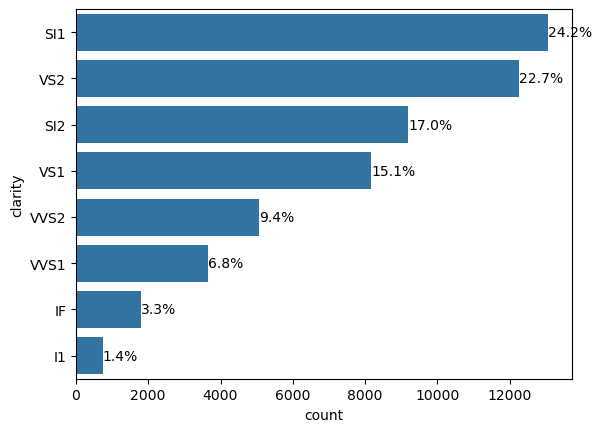

In [24]:
# Logic to print the proportion text on the bars
sns.countplot(data=df, y='clarity', color='tab:blue', order=order)
for i, count in enumerate(clarity_counts):
    # Convert count into a percentage, and then into string
    pct_string = f'{100*count/total_count:.1f}%'
    plt.text(count+1, i, pct_string, va='center')